In [7]:
import pandas as pd

df = pd.read_csv('loan_approval_dataset.csv')

In [8]:
# Show the first 5 rows
df.head()


,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [9]:
# Check the number of rows and columns
print("Shape of the dataset:", df.shape)

# Display basic info about data types and non-null counts
df.info()


Shape of the dataset: (4269, 13)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory

In [10]:
# Show number of missing values in each column
print("Missing values in each column:")
print(df.isnull().sum())


Missing values in each column:
loan_id                      0
 no_of_dependents            0
 education                   0
 self_employed               0
 income_annum                0
 loan_amount                 0
 loan_term                   0
 cibil_score                 0
 residential_assets_value    0
 commercial_assets_value     0
 luxury_assets_value         0
 bank_asset_value            0
 loan_status                 0
dtype: int64


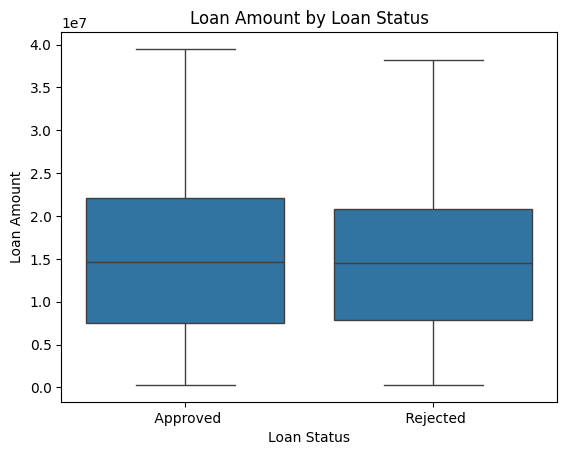

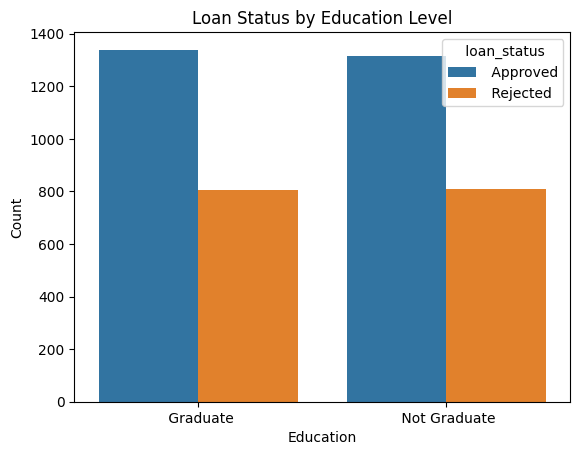

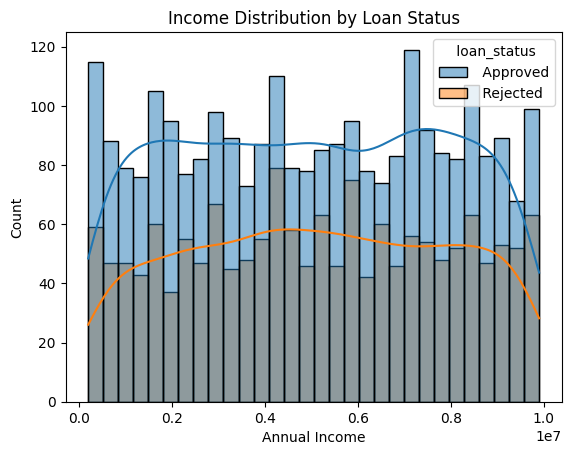

In [19]:
# Visualize Key Features
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Loan amount by loan status
sns.boxplot(x=' loan_status', y=' loan_amount', data=df)
plt.title("Loan Amount by Loan Status")
plt.xlabel("Loan Status")
plt.ylabel("Loan Amount")
plt.show()

# 2. Education vs Loan Status
sns.countplot(x=' education', hue=' loan_status', data=df)
plt.title("Loan Status by Education Level")
plt.xlabel("Education")
plt.ylabel("Count")
plt.show()

# 3. Income distribution by loan status
sns.histplot(data=df, x=' income_annum', hue=' loan_status', kde=True, bins=30)
plt.title("Income Distribution by Loan Status")
plt.xlabel("Annual Income")
plt.ylabel("Count")
plt.show()


In [24]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df[' education'] = le.fit_transform(df[' education'])
df[' self_employed'] = le.fit_transform(df[' self_employed'])
df[' loan_status'] = le.fit_transform(df[' loan_status'])  # target variable


In [25]:
# Split the Data

from sklearn.model_selection import train_test_split

# Separate features and target
X = df.drop(" loan_status", axis=1)
y = df[" loan_status"]

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [26]:
# Train the Model (Logistic Regression)
from sklearn.linear_model import LogisticRegression

# Train the model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [28]:
# Evaluate the Model
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

# Predict on test data
y_pred = model.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)




Accuracy: 0.8220140515222483


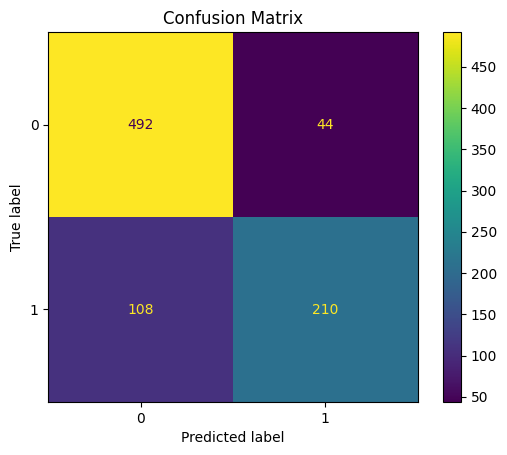

In [29]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Confusion Matrix")
plt.show()